In [1]:
!pip install -q symbulate
from symbulate import *
%matplotlib inline

# The Negative Binomial Model

In the binomial model, we drew a fixed number ($n$) of tickets from the box 

$$ \fbox{$\overbrace{\underbrace{\fbox{0}\ \fbox{0}\ \cdots\ \fbox{0}}_{\text{$N_0$ tickets}}\ \underbrace{\fbox{1}\ \fbox{1}\ \cdots\ \fbox{1}}_{\text{$N_1$ tickets}}}^{\text{$N$ tickets}}$}. $$

The number of $\fbox{1}$s we get in those $n$ draws is a random variable.

In the **negative binomial model**, we reverse our perspective. Instead of fixing the number of draws, we instead fix the number ($r$) of $\fbox{1}$s. We ask how many draws do we need until we get $r$ $\fbox{1}$s? Now, the number of draws is the random variable.

To be concrete, suppose we want to know how many times we need to roll a fair die until we encounter 3 sixes. We can simulate this by drawing from the box 

$$ \fbox{$\fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{1}$}. $$

There is no upper bound on the number of draws we need, so we make infinite draws from this box.

In [2]:
model = BoxModel([0, 0, 0, 0, 0, 1], size=inf, replace=True)

# This function determines the number of draws until we get 3 ones.
def time_until_3_ones(draws):
    number_of_ones = 0
    for index, draw in enumerate(draws):
        if draw == 1:
            number_of_ones += 1
            if number_of_ones == 3:
                return index + 1

X = RV(model, time_until_3_ones)
xs = X.sim(10000)
xs

0,25
1,29
2,24
3,16
4,6
5,22
6,17
7,16
8,12
...,...
9999,10


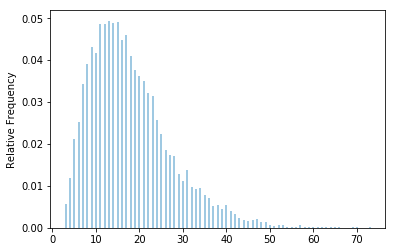

In [5]:
xs.plot()

We can approximate any probability by counting the number of simulations. For example, here's how we could approximate $P(X = 8)$ using the 10000 simulations above:

In [6]:
xs.count_eq(8) / 10000

0.0391

The problem with simulations is that they are not exact. We can get closer to the exact probabilities by increasing the number of simulations, but we will never get exact probabilities by simulation. (Not to mention that we get a different number each time the simulation is run.)

In this lecture, we derive an exact formula for the probabilities in the negative binomial model, in terms of $n$, $N_1$, and $N_0$. To summarize, the **negative binomial model** describes:

- the number of draws (with replacmement) you need
- to get $r$ $\fbox{1}$s
- from a box of $\fbox{0}$s and $\fbox{1}$s.

## Warm-Up Example

Before tackling the example above (rolling a die until $r=3$ sixes come up), let's first consider the simpler case where we roll a die until a six comes up. This is a negative binomial model with $r=1$. Some people call this special case of the negative binomial model the **geometric model**.

We draw from the box 
$$ \fbox{$\overbrace{\underbrace{\fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}}_{N_0=5}\ \underbrace{\fbox{1}}_{N_1=1}}^{N=6}$} $$
until we get a $\fbox{1}$. What is the probability it takes exactly 8 draws?

Even though we stop as soon as we get a $\fbox{1}$, let's imagine that we continue to roll the die, even after a $\fbox{1}$ has come up. Now, we focus on the first 8 rolls. All $6 \times 6 \times ... \times 6 = 6^8$ possible outcomes are equally likely.

In how many of these outcomes does the first six happen on the 8th roll? In order for this to happen, the draws must come out as 

$$ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{1}. $$

The number of outcomes following this pattern is 

$$ 5 \times 5 \times 5 \times 5 \times 5 \times 5 \times 5 \times 1 = 5^7 \cdot 1^1. $$

To obtain the probability, we divide by the total number of outcomes, so

$$ P(X = 8) = \frac{5^7 \cdot 1^1}{6^8}. $$

## A Special Case

Now let's tackle the example from earlier. What is the probability we need 8 rolls to get $r=3$ sixes?

We are still drawing from the box
$$ \fbox{$\overbrace{\underbrace{\fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}}_{N_0=5}\ \underbrace{\fbox{1}}_{N_1=1}}^{N=6}$}. $$

Again, consider the first 8 rolls. There are $6^8$ equally likely outcomes. 

In how many of these outcomes does the 3rd six come on the 8th roll? There are several ways this can happen, such as:

- $ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{1}\ \fbox{1}\ \fbox{1}\ \ \longrightarrow 5 \times 5 \times 5 \times 5 \times 5 \times 1 \times 1 \times 1 = 5^5 \cdot 1^3 \text{ outcomes}$
- $ \fbox{0}\ \fbox{1}\ \fbox{0}\ \fbox{0}\ \fbox{0}\ \fbox{1}\ \fbox{0}\ \fbox{1}\ \ \longrightarrow 5 \times 1 \times 5 \times 5 \times 5 \times 1 \times 5 \times 1 = 5^5 \cdot 1^3 \text{ outcomes}$
- $ \fbox{0}\ \fbox{0}\ \fbox{1}\ \fbox{0}\ \fbox{1}\ \fbox{0}\ \fbox{0}\ \fbox{1}\ \ \longrightarrow 5 \times 5 \times 1 \times 5 \times 1 \times 5 \times 5 \times 1 = 5^5 \cdot 1^3 \text{ outcomes}. $
- and many more....

For every single one of these patterns, there are exactly $5^5 \cdot 1^3$ corresponding outcomes. So to count the total number of outcomes, we simply multiply this number by the number of patterns. How many such patterns are there? If we need the 3rd $\fbox{1}$ to come on the 8th draw, then the 8th draw must be a $\fbox{1}$. That leaves 2 $\fbox{1}$s to be distributed anywhere among the first 7 draws. There are 
$$ \binom{7}{2} = \binom{8-1}{3-1} $$
ways to do this. So there are $\binom{7}{2}$ patterns where the 3rd $\fbox{1}$ comes on the 8th draw.

Putting everything together, the probability of getting the 3rd six on the 8th roll is 
$$ P(X = 8) = \frac{\binom{7}{2} \cdot 5^5 \cdot 1^3}{6^8}. $$

## The General Case

Now let's generalize the derivation above to general $r$, $N_1$, and $N_0$. (In the example above, $r = 3$, $N_1 = 1$ and $N_0 = 5$.) The probability that it takes exactly $x$ draws is 

$$ p_{r, N_1, N_0}(x) = P(X = x) = \frac{\binom{x-1}{r-1} N_1^r N_0^{x - r}}{N^x}. $$

Notice that this formula can be rewritten in terms of $p = N_1 / N$:

\begin{align*}
P(X = x) &= \frac{\binom{x-1}{r-1} N_1^r N_0^{x - r}}{N^x} \\
&= \binom{x-1}{r-1} \frac{ N_1^r N_0^{x-r}}{N^r N^{x-r}} \\
&= \binom{x-1}{r-1} p^r (1 - p)^{x-r} = p_{r, p}(x).
\end{align*}

This is the more common way of expressing the p.m.f. of the negative binomial.
You can plot or evaluate the p.m.f. in Symbulate:

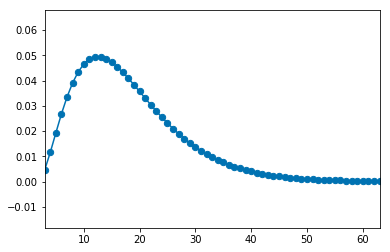

In [7]:
NegativeBinomial(r=3, p=1/6).plot()

In [8]:
NegativeBinomial(r=3, p=1/6).pdf(8)

0.03907143061271148

## Example. Roulette

In roulette, the ball is equally likely to land in any one of 38 pockets, which includes 18 red, 18 black, and 2 green. What is the probability that it will take more than 4 spins for the ball to land in a red pocket?

In [0]:
# YOUR CODE HERE